# Karplus-Strong Algorithm

In this notebook we are going to build a simple DSP system called the Karplus-Strong algorithm, which synth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import wave
from IPython.display import Audio

## Pure Sinusoid

First let's generate a single cosine wave with a particular frequency of 440 Hz. This is an A4 note.

We will use a sampling rate of 48,000 Hz.

In [2]:
sampleHz = 48000
t = np.arange(0.0, 2.0, 1 / sampleHz)

freq = 440
cos_signal = np.cos(t * 2.0 * math.pi * freq)

Now let's plot the first 0.01 seconds of this signal to make sure that worked.

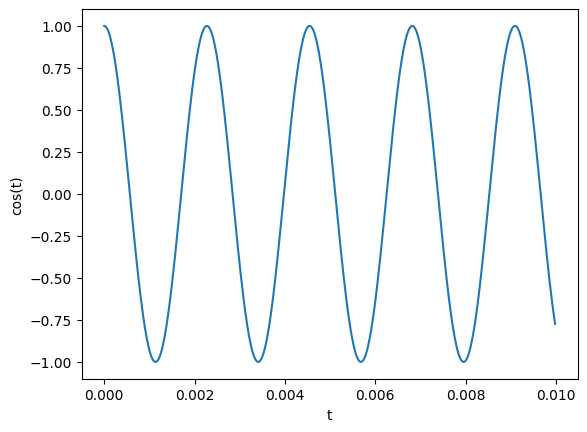

In [3]:
plt.plot(t[0:480], cos_signal[0:480])
plt.xlabel('t')
plt.ylabel('cos(t)')
plt.show()

We can play this cosine wave as an audio signal. This is a pure A4 tone! Sounds artificial.

In [4]:
audio = Audio(data = cos_signal, rate = sampleHz)
audio

## Karplus-Strong System

The Karplus-Strong algorithm is a simple DSP system to synthesize the sound of a plucked string, like on a guitar. It starts with generating an initial short noisy signal.

In [7]:
N = int(sampleHz / freq - 0.5)
cycles = freq * 2

t = np.arange(0.0, N * cycles / sampleHz, 1 / sampleHz)

kp_signal = np.zeros(N * cycles)
kp_signal[0:N] = np.random.uniform(-1.0, 1.0, N)

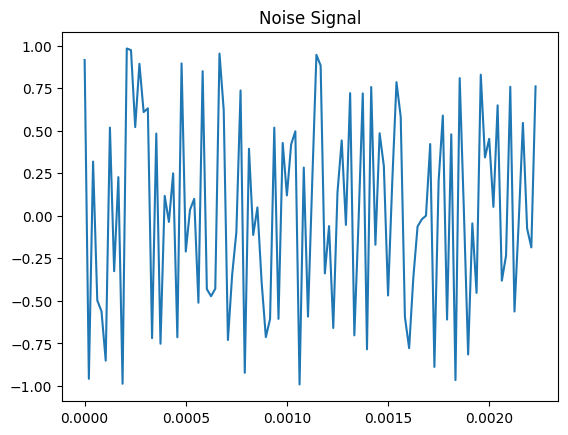

In [8]:
plt.plot(t[0:N], kp_signal[0:N])
plt.title("Noise Signal")
plt.show()

Here's what that sounds like. It is just a very short blip of static.

In [10]:
audio = Audio(data = kp_signal, rate = sampleHz)
audio

Now the Karplus-Strong system simply averages the time-delayed feedback.

In [11]:
for i in range(N, N * cycles):
    kp_signal[i] = 0.5 * (kp_signal[i - N] + kp_signal[i - N - 1])

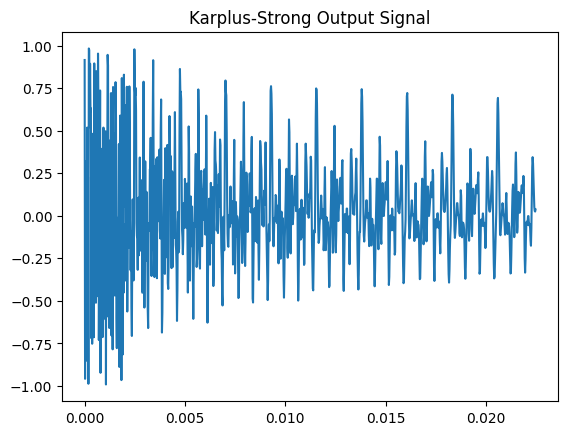

In [16]:
plt.plot(t[0:10*N], kp_signal[0:10*N])
plt.title("Karplus-Strong Output Signal")
plt.show()

Sounds sorta like a guitar string!

In [17]:
audio = Audio(data = kp_signal, rate = sampleHz)
audio